In [6]:
import torchvision
import torch.nn as nn
import torch.nn.functional as nnf
import torch
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms.functional import to_tensor, normalize
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torchvision import transforms, models
from torchvision.datasets import Food101

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
print(torch.cuda.get_device_name(0))

def test_acc(net: nn.Module, test_loader: DataLoader):

  net.to(device)
  net.eval()
  
  total = 0
  correct = 0

  for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    total += labels.size(0)

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum().item()

  return correct / total * 100

def loss_graph(losses):
    plt.plot(losses)

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

def accuracy_graph(accuracies):
    plt.plot(accuracies)

    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

cuda
NVIDIA GeForce RTX 4060 Laptop GPU


In [7]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import torch.nn as nn
from torchvision import transforms, models

class Food101Dataset(Dataset):
    def __init__(self, data_folder, transform=None):
        self.data_folder = data_folder
        self.transform = transform
        self.classes = sorted(os.listdir(data_folder))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.images = self._load_images()

    def _load_images(self):
        images = []
        for cls_name in self.classes:
            cls_path = os.path.join(self.data_folder, cls_name)
            for img_name in os.listdir(cls_path):
                img_path = os.path.join(cls_path, img_name)
                images.append((img_path, self.class_to_idx[cls_name]))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# Define transformation for the images
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Path to your data folder
data_folder = "C:/Users/Vlad Talpiga.VLR_PROJAMZ/OneDrive - Valrom Industrie SRL/Desktop/IAVA/Proiect/FoodClassifier/data/food-101/images"

# Create dataset
dataset = Food101Dataset(data_folder, transform=transform)

In [ ]:
for i in range(len(dataset)):
    if i % 1000 < 200:
        d.append

In [5]:
print(dataset[999])

(tensor([[[-1.0048, -0.9877, -0.9877,  ..., -0.9020, -1.1075, -1.2617],
         [-1.0048, -1.0048, -0.9877,  ..., -0.9020, -1.0733, -1.2274],
         [-0.9877, -0.9877, -0.9877,  ..., -0.8678, -1.0390, -1.2103],
         ...,
         [ 0.7933,  0.7762,  0.7762,  ...,  0.4166,  0.4166,  0.3994],
         [ 0.7762,  0.7762,  0.7591,  ...,  0.4166,  0.3994,  0.3823],
         [ 0.7591,  0.7591,  0.7419,  ...,  0.3994,  0.3994,  0.3823]],

        [[-1.2654, -1.2479, -1.2479,  ..., -0.9153, -1.1078, -1.2654],
         [-1.2654, -1.2654, -1.2479,  ..., -0.8978, -1.0728, -1.2304],
         [-1.2479, -1.2479, -1.2479,  ..., -0.8627, -1.0378, -1.1779],
         ...,
         [ 1.0105,  0.9930,  0.9930,  ...,  0.6078,  0.6078,  0.5903],
         [ 0.9930,  0.9930,  0.9755,  ...,  0.6078,  0.5903,  0.5728],
         [ 0.9755,  0.9755,  0.9580,  ...,  0.5903,  0.5903,  0.5728]],

        [[-0.7761, -0.7587, -0.7587,  ..., -0.0964, -0.2184, -0.3753],
         [-0.7761, -0.7761, -0.7587,  ..., -

In [39]:
c = 0
for i in range(len(dataset) - 1):
    if dataset[i][1] != dataset[i+1][1]:
        c += 1
print(c)

100


In [5]:
def split_dataset(dataset):
    l1, l2, l3, l4, l5, l6, l7, l8 = [], [], [], [], [], [], [], []
    x = 175
    for j in range(len(dataset)):
        if j % 1000 < 0 + x:
            l1.append(dataset[j])
        elif j % 1000 < 250:
            l2.append(dataset[j])
        elif j % 1000 < 250 + x:
            l3.append(dataset[j])
        elif j % 1000 < 500:
            l4.append(dataset[j])
        elif j % 1000 < 500 + x:
            l5.append(dataset[j])
        elif j % 1000 < 750:
            l6.append(dataset[j])
        elif j % 1000 < 750 + x:
            l7.append(dataset[j])
        else:
            l8.append(dataset[j])
    return l1, l2, l3, l4, l5, l6, l7, l8

l1, l2, l3, l4, l5, l6, l7, l8 = split_dataset(dataset)

print(len(l1), len(l2), len(l3), len(l4), len(l5), len(l6), len(l7), len(l8))

# split_loaders = [DataLoader(dataset, batch_size=batch_size, shuffle=True) for dataset in split_datasets]

# Modify the train_fn function to take multiple train and validation loaders
# def train_fn(epochs: int, train_loaders: list, val_loaders: list,
#              net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer, train_dataset_lengths):
#     # Loop over each part of the dataset
#     for part in range(4):
#         train_loader = train_loaders[part]
#         val_loader = val_loaders[part]
#         train_dataset_length = train_dataset_lengths[part]
        
#         losses = []
#         accuracies = []

#         net.to(device)

#         for e in range(epochs):
#             net.train()
#             running_loss = 0.0

#             for images, labels in train_loader:
#                 images, labels = images.to(device), labels.type(torch.LongTensor).to(device)

#                 optimizer.zero_grad()
#                 outputs = net(images)
#                 loss = loss_fn(outputs, labels)
#                 loss.backward()
#                 optimizer.step()

#                 running_loss += loss.item() * images.size(0)

#             epoch_loss = running_loss / train_dataset_length

#             print(f"Loss-ul la finalul epocii {e + 1} pentru partea {part + 1}: {epoch_loss}")

#             acc = test_acc(net, val_loader)
#             print(f"Acuratetea la finalul epocii {e + 1} pentru partea {part + 1} (pe setul de validare) este {acc:.2f}%")

#             losses.append(epoch_loss)
#             accuracies.append(acc)

#             torch.save(net.state_dict(), f'resnet50_part{part + 1}_epoch{e + 1}.pkl')

#         loss_graph(losses)
#         accuracy_graph(accuracies)

# # Split the dataset lengths for each part
# train_dataset_lengths = [len(dataset) for dataset in train_train_datasets]


: 

Training started
Loss-ul la finalul epocii 1: 2.1257125549064613
Acuratetea la finalul epocii 1 este 58.97%
Loss-ul la finalul epocii 2: 1.6860983123543238
Acuratetea la finalul epocii 2 este 63.01%
Loss-ul la finalul epocii 3: 1.5540092130604357
Acuratetea la finalul epocii 3 este 64.70%
Loss-ul la finalul epocii 4: 1.4756497556415722
Acuratetea la finalul epocii 4 este 65.10%
Loss-ul la finalul epocii 5: 1.4214347914107168
Acuratetea la finalul epocii 5 este 66.08%
Loss-ul la finalul epocii 6: 1.3759955676428162
Acuratetea la finalul epocii 6 este 66.84%
Loss-ul la finalul epocii 7: 1.3349173313493383
Acuratetea la finalul epocii 7 este 66.59%
Loss-ul la finalul epocii 8: 1.3020052466006955
Acuratetea la finalul epocii 8 este 67.54%
Loss-ul la finalul epocii 9: 1.2690218240970825
Acuratetea la finalul epocii 9 este 67.56%
Loss-ul la finalul epocii 10: 1.2442973637596608
Acuratetea la finalul epocii 10 este 68.64%
Loss-ul la finalul epocii 11: 1.2199819776264353
Acuratetea la finalul 

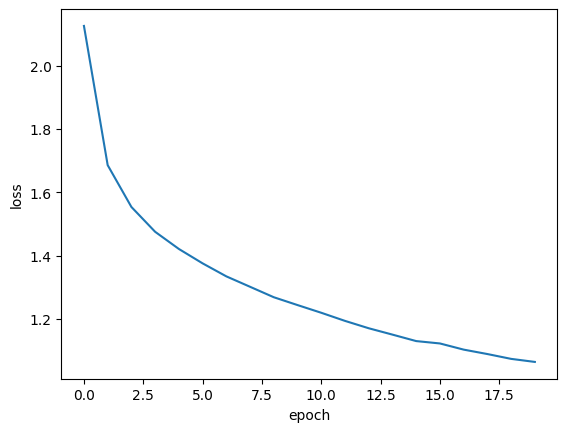

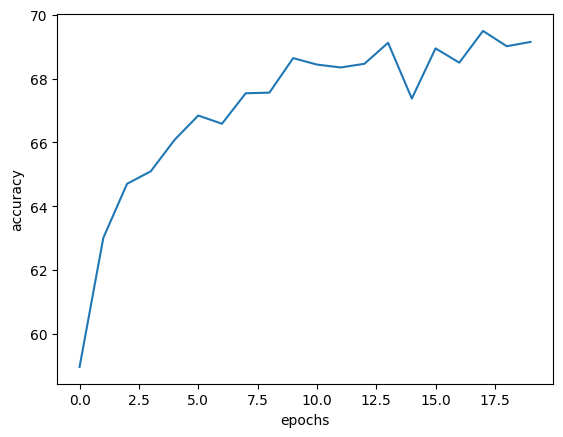

Duration of training: 459.01452225844065


In [5]:
class CustomClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CustomClassifier, self).__init__()

        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

num_classes = len(train_dataset.classes)
resnet = models.resnet50(pretrained=True)
resnet = nn.Sequential(*list(resnet.children())[:-1])

# Freeze all layers except the final classification layer
for param in resnet.parameters():
    param.requires_grad = False

resnet = nn.Sequential(
    resnet,
    CustomClassifier(num_classes)
)

# print(*list(resnet.children()))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(lr=0.001, momentum=0.9, weight_decay=0.0001)

epochs = 10
start = time.time()
print('Training started')

train_fn(epochs, train_loader, test_loader, resnet, loss_fn, optimizer, len(train_dataset))

end = time.time()
print(f'Duration of training: {(end - start) / 60}')